In [1]:
import pandas as pd

df = pd.read_excel('More_balanced_data_Berlin_accidents.xlsx')
df

,id,land,district,year,month,hour,day_of_week,accident_category,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition,longitude,latitude
0,219249,11,3,2021,11,18,2,3,0,3,2,0,1,0,1,0,0,1,13.426895,52.533940
1,219248,11,7,2021,12,19,7,3,6,2,2,0,1,1,0,0,0,1,13.392090,52.439951
2,219247,11,4,2021,12,17,4,3,5,2,2,0,1,0,0,0,0,0,13.326242,52.538028
3,219246,11,4,2021,12,15,7,3,5,2,1,0,1,0,1,0,0,1,13.316521,52.499534
4,219243,11,11,2021,12,9,5,3,3,6,0,0,1,0,0,0,1,2,13.525752,52.493867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,208823,11,8,2018,12,19,7,2,5,3,2,1,1,0,0,0,0,0,13.437087,52.474498
17281,208825,11,11,2018,12,10,7,2,0,1,0,1,0,0,0,0,0,1,13.501951,52.501969
17282,208828,11,1,2018,12,2,7,1,8,1,2,0,1,1,0,0,0,1,13.384187,52.555649
17283,208832,11,11,2018,12,14,6,2,5,2,1,0,1,0,0,0,0,0,13.467801,52.546463


In [2]:
#X, y split
y=pd.DataFrame(df['accident_category'])
#X=data_num
X=df[['district','month', 'hour','day_of_week','accident_details', 'accident_type','light_condition','acc_with_bike',
                 'acc_with_car', 'acc_with_ped','acc_with_motobike', 'acc_with_truck','acc_with_other', 'road_condition']].copy()
X

,district,month,hour,day_of_week,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition
0,3,11,18,2,0,3,2,0,1,0,1,0,0,1
1,7,12,19,7,6,2,2,0,1,1,0,0,0,1
2,4,12,17,4,5,2,2,0,1,0,0,0,0,0
3,4,12,15,7,5,2,1,0,1,0,1,0,0,1
4,11,12,9,5,3,6,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,8,12,19,7,5,3,2,1,1,0,0,0,0,0
17281,11,12,10,7,0,1,0,1,0,0,0,0,0,1
17282,1,12,2,7,8,1,2,0,1,1,0,0,0,1
17283,11,12,14,6,5,2,1,0,1,0,0,0,0,0


In [3]:
# Import the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [4]:
# Split the data into a training set and a test set.
TT_SPLIT = 0.2     # ratio train/test size #proportion test set split
RAND_STATE = 123   # specifies a sampling for repeatable results
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [5]:
y_test

,accident_category
1000,3
12014,2
15233,2
2735,3
14602,2
...,...
9599,3
10121,3
7424,3
1090,3


In [6]:
df['accident_category'].value_counts() # My dataset is  unbalanced.

3    9581
2    7553
1     151
Name: accident_category, dtype: int64

#downsampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['accident_category'])

#downsampling
y_train_res.value_counts()

#downsampling
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":20,   #level of decision tree
           "min_samples_leaf":8, 
           "max_features": 'sqrt', #number of columns
           "n_estimators":30, #number of decision trees
           "bootstrap":False, 
           "oob_score":False,
           "random_state":123}

rf = RandomForestClassifier(**parameters)
rf.fit(X_train_res, y_train_res['accident_category'])


print("train prediction accuracy score: %.2f" %(rf.score(X_train_res, y_train_res)))
print("test prediction accuracy score: %.2f"  %(rf.score(X_test, y_test)))

In [7]:
# Balancing data using SMOTE
# Upsampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

accident_category
3                    7668
2                    7668
1                    7668
dtype: int64

#Cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB



parameters = {
    "max_depth": [10, 20, 30],   #level of decision tree
    "min_samples_leaf": [5, 8, 10],
    "max_features": [None, "sqrt", "log2"], #number of columns
    "n_estimators": [50, 100, 150], #number of decision trees
    "bootstrap": [True, False], 
    "oob_score": [True, False],
    "random_state": [RAND_STATE]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_sm, y_sm['accident_category'])

print("Best parameters:", grid_search.best_params_)
print("Validation accuracy:", grid_search.best_score_)

#RandomUpSampler 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_sm, y_sm)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['accident_category'])

In [8]:
#Best parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150, 'oob_score': False, 'random_state': 123}
#Validation accuracy: 0.8796706557042387

#Trying best parameters from cv

from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":30,   #level of decision tree
           "min_samples_leaf":8, 
           "max_features":'sqrt', #number of columns
           "n_estimators":100, #number of decision trees
           "bootstrap":True, 
           "oob_score":True,
           "random_state":123,
           "class_weight":None}

rf = RandomForestClassifier(**parameters)
rf.fit(X_sm, y_sm['accident_category'])


print("train prediction accuracy score: %.2f" %(rf.score(X_sm, y_sm)))
print("test prediction accuracy score: %.2f"  %(rf.score(X_sm, y_sm)))

train prediction accuracy score: 0.80
test prediction accuracy score: 0.80


unique_classes = y_sm['accident_category'].unique()
print(unique_classes)

In [9]:
y_pred = rf.predict(X_test)
unique_pred_classes = np.unique(y_pred)
print(unique_pred_classes)

[1 2 3]


In [10]:
X_train

,district,month,hour,day_of_week,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition
15053,3,12,19,6,5,2,2,0,1,0,1,0,0,1
11550,12,1,11,2,0,2,0,0,1,0,0,0,1,0
2038,5,10,19,3,5,2,2,0,1,0,0,0,0,1
1545,7,10,5,5,5,2,2,0,0,0,1,0,1,0
5948,1,5,12,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9,12,13,7,6,4,0,0,1,1,0,0,0,0
13435,11,1,16,5,0,6,2,0,1,0,0,0,1,0
7763,9,4,9,3,5,2,0,1,1,0,0,0,0,0
15377,3,8,3,1,8,1,2,0,1,0,0,0,1,0


In [11]:
def prediction():
    #t = X_test.iloc[:1].copy()
    t = pd.DataFrame()
    t.iloc[:] = 0
    
    t.at[0, 'district'] = 1
    t.at[0, 'month'] = 4
    t.at[0, 'hour'] = 15
    t.at[0, 'day_of_week'] = 3
    t.at[0, 'accident_details'] = 5
    t.at[0, 'accident_type'] = 2
    t.at[0, 'light_condition'] = 0
    t.at[0, 'acc_with_bike'] = 0
    t.at[0, 'acc_with_car'] = 0
    t.at[0, 'acc_with_ped'] = 1
    t.at[0, 'acc_with_motobike'] = 0
    t.at[0, 'acc_with_truck'] = 1 
    t.at[0, 'acc_with_other'] = 0
    t.at[0, 'road_condition'] = 0

    
    severity = rf.predict(t)
    severity_probabilty = rf.predict_proba(t)

    output = f'Predicted severity of the accident is: {severity}, {severity_probabilty}'
  
    
    return output
#Next time there is an accident, the most likely accident type will be:

In [12]:
prediction()

'Predicted severity of the accident is: [1], [[0.83359774 0.10941981 0.05698244]]'

In [164]:
pd.DataFrame(y_pred).value_counts()

3    1913
2    1456
1      88
dtype: int64

In [185]:
X_train

,district,month,hour,day_of_week,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition
15053,3,12,19,6,5,2,2,0,1,0,1,0,0,1
11550,12,1,11,2,0,2,0,0,1,0,0,0,1,0
2038,5,10,19,3,5,2,2,0,1,0,0,0,0,1
1545,7,10,5,5,5,2,2,0,0,0,1,0,1,0
5948,1,5,12,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9,12,13,7,6,4,0,0,1,1,0,0,0,0
13435,11,1,16,5,0,6,2,0,1,0,0,0,1,0
7763,9,4,9,3,5,2,0,1,1,0,0,0,0,0
15377,3,8,3,1,8,1,2,0,1,0,0,0,1,0


In [186]:
y_train

,accident_category
15053,2
11550,2
2038,3
1545,3
5948,3
...,...
96,3
13435,2
7763,3
15377,1


## to get prediction nr. 3

def prediction():
    #t = X_test.iloc[:1].copy()
    t = pd.DataFrame()
    t.iloc[:] = 0
    
    t.at[0, 'district'] = 9
    t.at[0, 'month'] = 4
    t.at[0, 'hour'] = 9
    t.at[0, 'day_of_week'] = 3
    t.at[0, 'accident_details'] = 5
    t.at[0, 'accident_type'] = 2
    t.at[0, 'light_condition'] = 0
    t.at[0, 'acc_with_bike'] = 1
    t.at[0, 'acc_with_car'] = 1
    t.at[0, 'acc_with_ped'] = 0
    t.at[0, 'acc_with_motobike'] = 0
    t.at[0, 'acc_with_truck'] = 0 
    t.at[0, 'acc_with_other'] = 0
    t.at[0, 'road_condition'] = 0

    
    severity = rf.predict(t)
    severity_probabilty = rf.predict_proba(t)

    output = f'Predicted severity of the accident is: {severity}, {severity_probabilty}'
  
    
    return output
#Next time there is an accident, the most likely accident type will be:

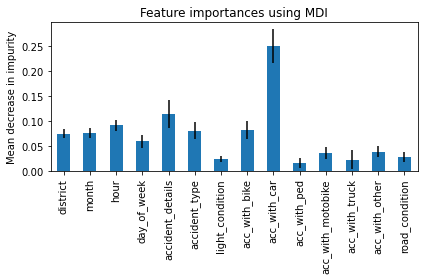

In [95]:
rf = RandomForestClassifier(**parameters)
rf.fit(X_sm, y_sm['accident_category'])

#obtaining the feature importance as pandas Series
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_sm.columns)

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) #calculate standaed dev of the feature importances

#Plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [97]:
#Getting feature importance
importances = rf.feature_importances_
rf.fit(X_sm, y_sm['accident_category'])
indices = np.argsort(importances)[::-1] # sort features by importance in descending order
print("Feature ranking:")
for f in range(X_sm.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_sm.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. acc_with_car (0.250020)
2. accident_details (0.114638)
3. hour (0.091858)
4. acc_with_bike (0.081898)
5. accident_type (0.081465)
6. month (0.076878)
7. district (0.075386)
8. day_of_week (0.059620)
9. acc_with_other (0.039380)
10. acc_with_motobike (0.036226)
11. road_condition (0.028616)
12. light_condition (0.024264)
13. acc_with_truck (0.023036)
14. acc_with_ped (0.016715)
